In [1]:
from bayesian_predic__ import BayPredict
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import argparse
import json
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
results = {
    'N_categorias':[],
    'MAE':[],
    'MAPE':[],
    'RMSE':[]

}

for i in range(3,21):

    with open('ind_005.json', 'r') as f:
        params = json.load(f)

    N_YEARS = params['n_years']
    NORM_TYPE = params['norm_type']
    #N_CAT = params['n_cat']
    N_CAT = i
    TARGET_VRIABLE = params['target_variable']
    TOPOLOGY = params['topologia']
    DATA_SOURCE = params['data_source']
    STARTING_YEAR = params['starting_year']

    pred = BayPredict(N_YEARS, NORM_TYPE, N_CAT, TARGET_VRIABLE, TOPOLOGY, DATA_SOURCE, STARTING_YEAR)

    pred.create_observed_inference_file()

    time.sleep(2)

    _ = pred.get_predictions('modelo_arquivo_4.json') #realiza uma previsão dado um arquivo de inferências o arquivo padrão gerado tem o nome 'modelo_arquivo_4.json'

    df = pred.show_predictions(plot=False) #retorna um dataframe com os limites superior e inferior além do valor médio da previsão

    mape = mean_absolute_percentage_error(df['LPC_SECO'], df['mean'])
    rmse = mean_squared_error(df['LPC_SECO'], df['mean'])
    mae = mean_absolute_error(df['LPC_SECO'], df['mean'])

    results['N_categorias'].append(i)
    results['MAE'].append(mae)
    results['MAPE'].append(mape)
    results['RMSE'].append(rmse)

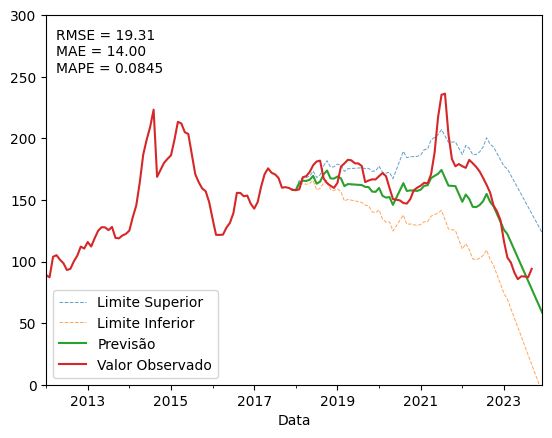

In [2]:
with open('ind_007.json', 'r') as f:
        params = json.load(f)

N_YEARS = params['n_years']
NORM_TYPE = params['norm_type']
N_CAT = params['n_cat']
#N_CAT = i
TARGET_VRIABLE = params['target_variable']
TOPOLOGY = params['topologia']
DATA_SOURCE = params['data_source']
STARTING_YEAR = params['starting_year']

pred = BayPredict(N_YEARS, NORM_TYPE, N_CAT, TARGET_VRIABLE, TOPOLOGY, DATA_SOURCE, STARTING_YEAR)

pred.create_observed_inference_file([]) #PARA INCLUIR VARIAVEIS NAO INDEPENDENTES DO MODELO NAS INFERENCIAS, ADICIONALAS À LISTA

time.sleep(1)

_ = pred.get_predictions('modelo_arquivo_4.json') #realiza uma previsão dado um arquivo de inferências o arquivo padrão gerado tem o nome 'modelo_arquivo_4.json'

#após essa linha
df = pred.show_predictions(plot=True)
#adicionar
# df.to_parquet('resultados.parquet')
# #ou
# df.to_csv('resultados.csv')

c:\Users\lauro\AppData\Local\Programs\Python\Python311\Lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:799: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi1.values


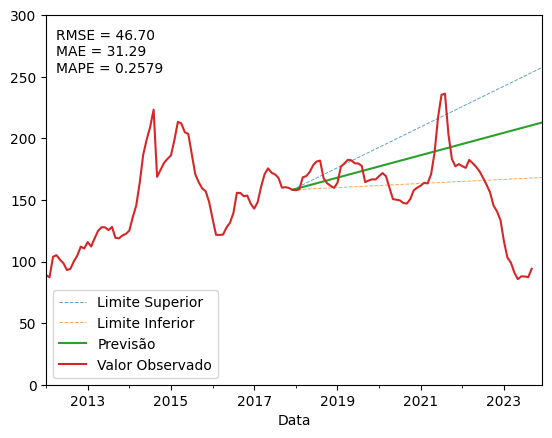

In [3]:
_ = pred.get_predictions('modelo_arquivo_3.json') #realiza uma previsão dado um arquivo de inferências o arquivo padrão gerado tem o nome 'modelo_arquivo_4.json'

#após essa linha
df = pred.show_predictions(plot=True)
#adicionar
# df.to_parquet('resultados.parquet')
# #ou
# df.to_csv('resultados.csv')

<Axes: xlabel='Data'>

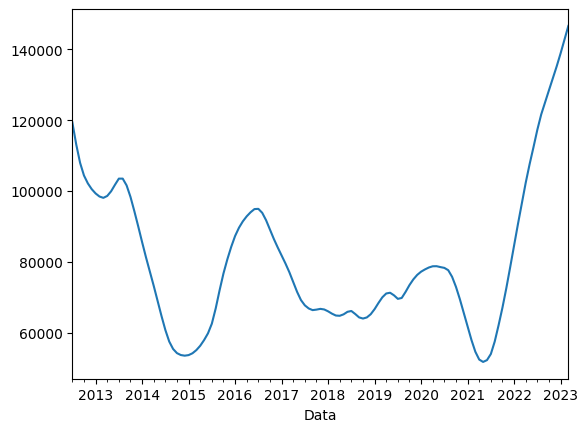

In [9]:
pred.DESEASONED_DF['EA_SECO'].plot()

<Axes: xlabel='Data'>

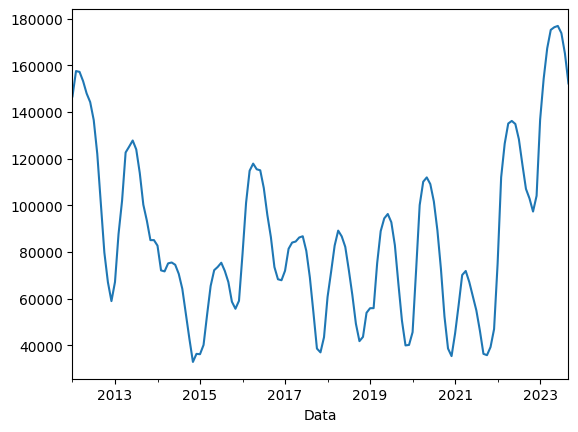

In [6]:
pred.BASE_DF['EA_SECO'].plot()

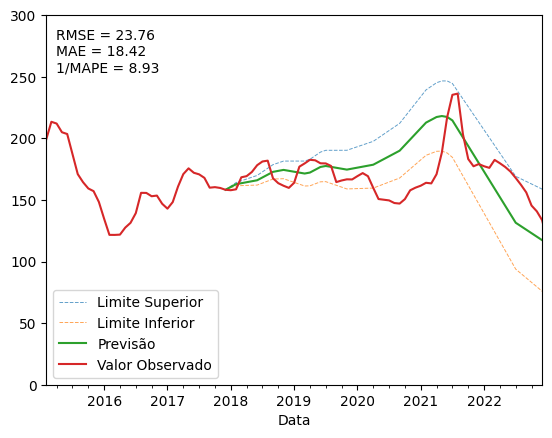

,mean,upper_lim,lower_lim,LPC_SECO
2017-12-01,158.228000,158.228000,158.228000,158.2280
2018-01-01,160.501789,161.143768,159.859810,157.8850
2018-02-01,162.775578,164.059536,161.491620,158.6125
2018-03-01,163.571443,165.512306,161.630580,168.3580
2018-04-01,164.367308,166.965075,161.769541,169.3050
...,...,...,...,...
2022-08-01,128.653773,167.076435,90.231111,162.2350
2022-09-01,125.827921,165.005316,86.650525,156.0825
2022-10-01,123.002068,162.934197,83.069939,145.4140
2022-11-01,120.176215,160.863078,79.489353,140.7375


In [4]:
pred.show_predictions(plot=True, g_df=pred.BASE_DF.loc['2015':'2022',:])

In [6]:
with open('limites_das_categorias.json', 'w') as f:
    json.dump(pred.get_cat_limits(), f, indent=3)

In [ ]:
with open('ind_007.json', 'r') as f:
        params = json.load(f)

N_YEARS = params['n_years']
NORM_TYPE = params['norm_type']
N_CAT = params['n_cat']
#N_CAT = i
TARGET_VRIABLE = params['target_variable']
TOPOLOGY = params['topologia']
DATA_SOURCE = params['data_source']
STARTING_YEAR = params['starting_year']

pred = BayPredict(N_YEARS, NORM_TYPE, N_CAT, TARGET_VRIABLE, TOPOLOGY, DATA_SOURCE, STARTING_YEAR)

pred.create_observed_inference_file([]) #PARA INCLUIR VARIAVEIS NAO INDEPENDENTES DO MODELO NAS INFERENCIAS, ADICIONALAS À LISTA

time.sleep(1)

_ = pred.get_predictions('modelo_arquivo_4.json') #realiza uma previsão dado um arquivo de inferências o arquivo padrão gerado tem o nome 'modelo_arquivo_4.json'

df = pred.show_predictions(plot=True)

In [5]:
df.index = df.index.strftime('%Y-%m-%d')

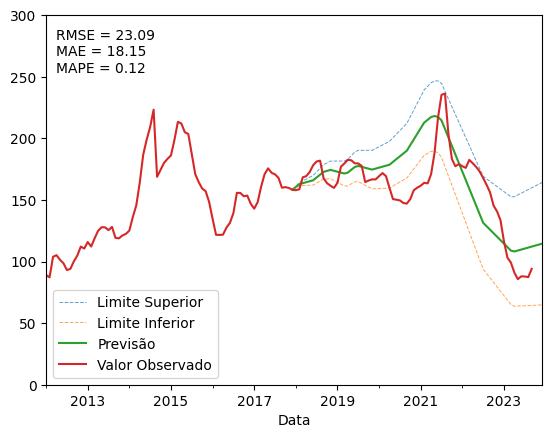

In [7]:

df = pred.show_predictions(plot=True, g_df=pred.BASE_DF.loc['2019':'2023',:])

In [5]:
pred.BASE_DF.query('"2012-01-01":"2023-12-31"')

SyntaxError: illegal target for annotation (<unknown>, line 1)

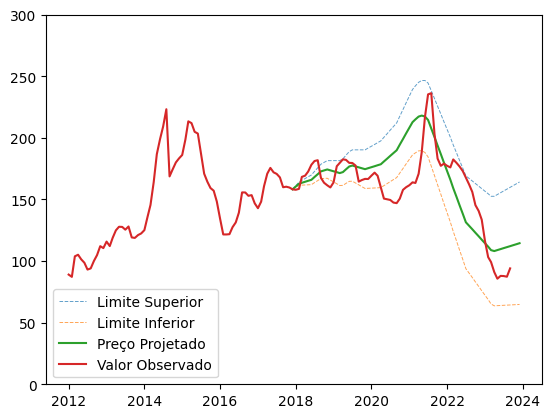

ValueError: too many values to unpack (expected 2)

In [3]:
df, ax = pred.show_predictions(plot=True)

In [13]:
mape = mean_absolute_percentage_error(df['LPC_SECO'], df['mean'])
rmse = mean_squared_error(df['LPC_SECO'], df['mean'])
mae = mean_absolute_error(df['LPC_SECO'], df['mean'])

In [16]:
results = {
    'N_categorias':[],
    'MAE':[],
    'MAPE':[],
    'RMSE':[]

}

results['N_categorias'].append(5)
results['MAE'].append(mae)
results['MAPE'].append(mape)
results['RMSE'].append(rmse)

In [17]:
df = pd.DataFrame(results)
df

,N_categorias,MAE,MAPE,RMSE
0,5,18.673167,0.126694,571.128277


In [14]:
df.to_excel('copia.xlsx', index=False)

In [10]:
import numpy as np

In [5]:
aux = pred.get_value_cat_df().loc[:, [pred.TARGET_VRIABLE, pred.TARGET_VRIABLE + '_CAT']]

In [13]:
alpha = 0.95
array = aux.query(f'{pred.TARGET_VRIABLE + "_CAT"} == {0}')[TARGET_VRIABLE]

lower = np.percentile(array, (1 - alpha) / 2 * 100)
upper = np.percentile(array, (alpha + (1 - alpha) / 2) * 100)

In [25]:
pred.DESEASONED_DF

,EOL,HID,NUC,TER,SIN-DM,SIN-EA,PLD,Preco,Preco_L
Data,,,,,,,,,
2012-07-31,1579.027083,215153.742917,7812.882917,27104.326667,310697.123750,730067.250000,182.922009,150.186479,101.635583
2012-08-31,1616.706250,212640.382083,7678.286667,29566.915000,311288.683750,696517.250000,206.034490,165.320500,103.735000
2012-09-30,1683.304583,209960.863750,7819.934583,31725.868333,311522.550000,665111.208333,221.812294,178.925604,105.266771
2012-10-31,1722.440833,207889.077917,7946.987500,33188.295000,311526.926667,643115.666667,230.904487,190.449792,106.676792
2012-11-30,1735.332917,206586.774583,7655.612083,34401.077083,311693.065000,630890.250000,237.876677,200.833458,108.650354
...,...,...,...,...,...,...,...,...,...
2023-02-28,45239.955833,215370.012917,7898.083333,27234.875000,368561.915417,920562.166667,64.952331,69.234750,113.338021
2023-03-31,45682.250000,218224.921250,8039.131250,27386.791250,374447.411250,945588.837917,65.636876,68.322333,107.807000
2023-04-30,45818.210417,219633.981667,7745.093333,27288.021667,377462.375833,962002.595417,67.446811,69.035417,103.801958


In [24]:
pred.DESEASONED_DF.diff()

,EOL,HID,NUC,TER,SIN-DM,SIN-EA,PLD,Preco,Preco_L
Data,,,,,,,,,
2012-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-31,37.679167,-2513.360833,-134.596250,2462.588333,591.560000,-33550.000000,23.112482,15.134021,2.099417
2012-09-30,66.598333,-2679.518333,141.647917,2158.953333,233.866250,-31406.041667,15.777804,13.605104,1.531771
2012-10-31,39.136250,-2071.785833,127.052917,1462.426667,4.376667,-21995.541667,9.092192,11.524188,1.410021
2012-11-30,12.892083,-1302.303333,-291.375417,1212.782083,166.138333,-12225.416667,6.972190,10.383667,1.973562
...,...,...,...,...,...,...,...,...,...
2023-02-28,388.872083,-537.599167,283.908333,-134.356250,1079.049583,17830.510000,-0.214382,-1.961208,-6.428479
2023-03-31,442.294167,2854.908333,141.047917,151.916250,5885.495833,25026.671250,0.684545,-0.912417,-5.531021
2023-04-30,135.960417,1409.060417,-294.037917,-98.769583,3014.964583,16413.757500,1.809935,0.713083,-4.005042


In [10]:
pred.get_value_cat_df()

,HID,HID_CAT,TER,TER_CAT,CE_SECO,CE_SECO_CAT,GE_SECO,GE_SECO_CAT,DM_SECO,DM_SECO_CAT,CI_SECO,CI_SECO_CAT,EA_SECO,EA_SECO_CAT,LPC_SECO,LPC_SECO_CAT,PIB,PIB_CAT
Data,,,,,,,,,,,,,,,,,,
2012-08-01,-2513.360833,0,2462.588333,7,-104.627708,1,-231.806562,1,74.511667,5,193.302917,4,-6224.427083,0,2.157083,6,3525.462500,5
2012-09-01,-2679.518333,0,2158.953333,7,-121.995667,0,-257.222271,0,37.571146,3,196.800417,4,-5209.956250,0,1.667292,5,3122.379167,4
2012-10-01,-2071.785833,1,1462.426667,6,-159.672854,0,-414.270187,0,-13.218333,2,194.726250,4,-3573.175000,0,1.451250,5,3165.883333,4
2012-11-01,-1302.303333,2,1212.782083,6,-146.470729,0,-532.552083,0,0.271979,2,179.935000,3,-2222.802083,1,1.925521,5,3268.195833,4
2012-12-01,-1807.925000,1,2251.760417,7,-33.355792,2,-345.536979,0,49.959146,4,183.759167,3,-1633.843750,2,2.312438,6,2744.016667,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,-205.128333,3,202.654583,4,24.806792,3,415.721604,7,60.780958,4,735.972500,7,3344.765313,6,-7.490896,0,7903.941667,6
2022-12-01,-959.042083,2,-22.472083,4,126.906979,6,495.780208,7,67.333646,4,1190.958750,7,3423.561667,6,-7.339167,0,7208.837500,6
2023-01-01,-1557.294167,1,-86.649167,3,73.810688,5,413.317021,7,27.222937,3,1222.632500,7,3643.975021,6,-6.876104,0,6896.229167,6


In [28]:
(pred.BASE_DF.diff()/pred.BASE_DF.shift(1)).sort_values(by='Preco_L', ascending=False)

,EOL,HID,NUC,TER,SIN-DM,SIN-EA,PLD,Preco,Preco_L
Data,,,,,,,,,
2012-03-31,0.208859,0.247576,-0.356150,0.557704,0.242320,0.235353,1.467427e+00,1.042853,0.194991
2021-06-30,-0.101274,-0.313453,-0.640957,0.102180,-0.215035,-0.245332,5.408536e-01,0.284343,0.157639
2014-04-30,-0.252548,-0.250530,-0.415193,-0.226051,-0.238933,-0.161206,-1.381656e-16,0.143596,0.152092
2023-09-30,0.330446,0.329829,-0.062146,0.194549,0.318417,0.159128,1.640981e-01,-0.004709,0.110778
2016-08-31,-0.195527,-0.208936,-0.013737,-0.106648,-0.191911,-0.283420,3.853706e-01,0.479174,0.107086
...,...,...,...,...,...,...,...,...,...
2015-07-31,0.132009,0.043130,0.371319,-0.157719,-0.010189,0.063139,-3.558876e-01,-0.395178,-0.112358
2023-01-31,-0.186991,-0.122670,-0.189634,-0.307506,-0.160982,0.013192,2.394973e-01,0.013655,-0.137826
2021-09-30,-0.033319,0.068671,0.005708,-0.182116,0.016482,-0.174133,-1.114939e-02,-0.143489,-0.195200
